In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.interpolate import interp1d


In [2]:
beta_hel_minus = np.loadtxt('gd_beta_antipar.csv', delimiter = "; ")
beta_hel_plus = np.loadtxt('gd_beta_par.csv', delimiter = ';')
delta_hel_plus = np.loadtxt('gd_delta_par.csv', delimiter = ";")
delta_hel_minus = np.loadtxt('gd_delta_antipar.csv', delimiter = ";")

<IPython.core.display.Javascript object>


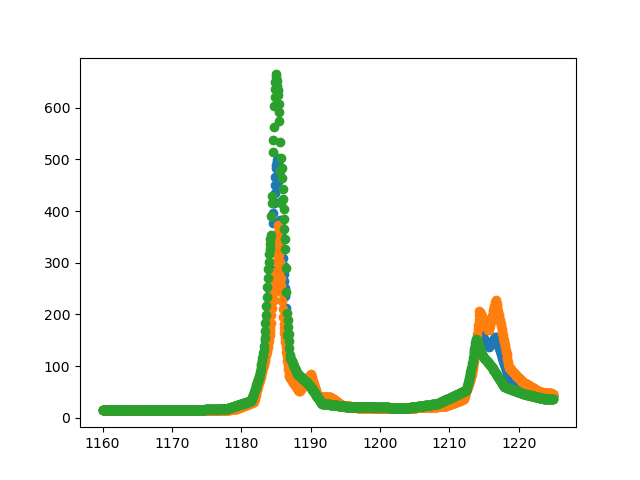

<ErrorbarContainer object of 3 artists>

In [3]:
%matplotlib notebook
#plt.errorbar(beta_hel_minus[:,0], beta_hel_minus[:,1], fmt = 'o')
#plt.errorbar(beta_hel_plus[:,0], beta_hel_plus[:,1], fmt = 'o')


def fix_dubplicates(arr):
    unique, unique_idx = np.unique(arr[:,0], return_index=True)
    filtered_vals = arr[:,1][unique_idx]
    combined = np.vstack((unique, filtered_vals))
    return combined

def delta_to_form_factor(energ, arr):
    r_e = 2.82e-15 # im meters
    n_a = 7.9e3/(157.25*1.66e-27) # Gd atoms pro m^3
    c_0 = 299792458 # m/s
    h = 6.626e-34
    coef = 2*np.pi*(energ*1.60218e-19)**2/(n_a*r_e*c_0**2*h**2)
    return coef*arr
    
x = np.linspace(1160, 1225, 1000)
beta_minus = np.interp(x, *fix_dubplicates(beta_hel_minus))
beta_plus = np.interp(x, *fix_dubplicates(beta_hel_plus))

beta_f_minus = delta_to_form_factor(x, beta_minus)
beta_f_plus = delta_to_form_factor(x, beta_plus)

beta_f_mean = 0.5*(beta_f_minus+beta_f_plus) 
beta_f_diff = beta_f_plus - beta_f_mean

plt.errorbar(x, beta_f_mean, fmt='o')
plt.errorbar(x, beta_f_minus, fmt='o')
plt.errorbar(x, beta_f_plus, fmt='o')



<IPython.core.display.Javascript object>


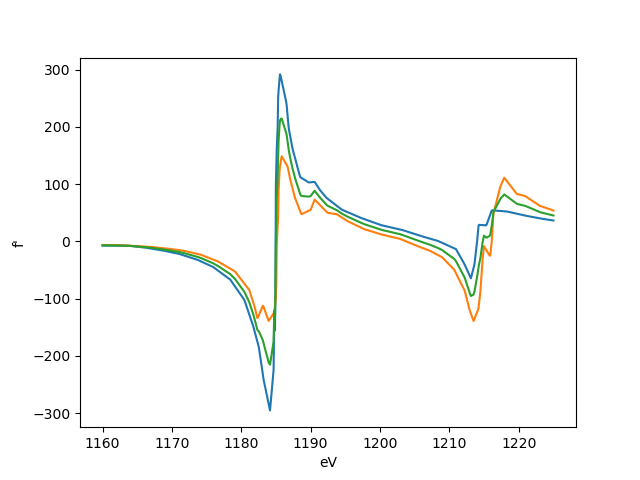

<ErrorbarContainer object of 3 artists>

In [4]:
%matplotlib notebook

#plt.errorbar(delta_hel_plus[:,0], delta_hel_plus[:,1], fmt = 'o')
#plt.errorbar(delta_hel_minus[:,0], delta_hel_minus[:,1], fmt = 'o')

delta_minus = np.interp(x, *fix_dubplicates(delta_hel_minus))
delta_plus = np.interp(x, *fix_dubplicates(delta_hel_plus))

delta_f_minus  = delta_to_form_factor(x, delta_minus)
delta_f_plus = delta_to_form_factor(x, delta_plus)

delta_f_mean = 0.5*(delta_f_minus+delta_f_plus)
delta_f_diff = delta_f_plus - delta_f_mean

plt.xlabel('eV')
plt.ylabel('f\'')
plt.errorbar(x,delta_f_minus)
plt.errorbar(x,delta_f_plus)
plt.errorbar(x, delta_f_mean)

In [5]:
#fe_leonid.nff file
f = open("gd_leonid.nff", "w")
for e, f1, f2 in zip(x, delta_f_mean, beta_f_mean):
    f.write('   %e   %e   %e\n' % (e, f1, f2))
f.close()

f = open("gd_leonid.mf", "w")
for e, m1, m2 in zip(x, delta_f_diff, beta_f_diff):
    f.write('   %e   %e   %e\n' % (e, m1, m2))
f.close()